# Ch03. Conway

## 1. 그리드 맵

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255
OFF = 0

## 2. 랜덤 그리드 추가

In [2]:
def addRandomGrid(N):
    return np.random.choice([ON,OFF], N*N, p=[0.1, 0.9]).reshape(N,N)

## 3. 글라이더 그리드 추가

In [3]:
def addGlider(i, j, grid):
    glider = np.array([
        [0,0,255],
        [255,0,255],
        [0,255,255]
    ])
    grid[i:i+3, j:j+3] = glider

## 4. 그리드 갱신

In [4]:
def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = int(
                (
                    grid[i,(j-1)%N] + grid[i,(j+1)%N] + 
                    grid[(i-1)%N,j] + grid[(i+1)%N,j] + 
                    grid[(i-1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N] + 
                    grid[(i+1)%N,(j-1)%N] + grid[(i+1)%N,(j+1)%N]
                ) / 255
            )
            if grid[i,j] == ON:
                if (total<2) or (total>3):
                    newGrid[i,j] = OFF
            else:
                if total == 3:
                    newGrid[i,j] = ON
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

## 5. 실행

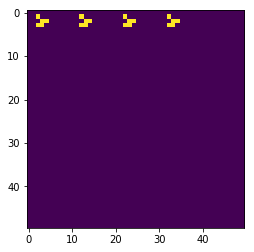

In [5]:
# 그리드 맵 선언
N = 50
grid = np.array([])
grid = np.zeros(N*N).reshape(N, N)

# 랜덤 그리드 추가
# grid = addRandomGrid(N)

# 글라인더 그리드 추가
addGlider(1, 1, grid)
addGlider(1, 11, grid)
addGlider(1, 21, grid)
addGlider(1, 31, grid)

# 애니메이션 설정
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
anim = animation.FuncAnimation(
    fig, update, fargs=(img, grid, N,),
    frames=10, interval=50, save_count=50)  
plt.show()

## 6. 출력

In [6]:
import IPython.display

# 그리드 맵 선언
N = 50
grid = np.array([])
grid = np.zeros(N*N).reshape(N, N)

# 랜덤 그리드 추가
grid = addRandomGrid(N)

# 애니메이션 설정
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
anim = animation.FuncAnimation(fig, update, fargs=(img, grid, N,), frames=80)

# 애니메이션 저장 (with imagemagick)
anim.save('./conway.gif', writer='imagemagick', fps=80)

# 애니메이션 출력
IPython.display.Image(url='conway.gif')